## Import Dependencies

In [1]:
import numpy as np
from Scripts import VoxelizeData as vd

## Voxelize Necessary Datasets

### Voxelize ModelNet40 Dataset

In [ ]:
path = 'Data/ModelNet40/'
dataset = 'ModelNet40'
save_path = 'Data/ModelNet40/ModelNet40'

vox = vd.Voxelize(path, dataset, system='Unix', save=True, save_path=save_path, overwrite=False)

### Test Voxelized ModelNet40 Data

(9843, 32, 32, 32)
(9843,)


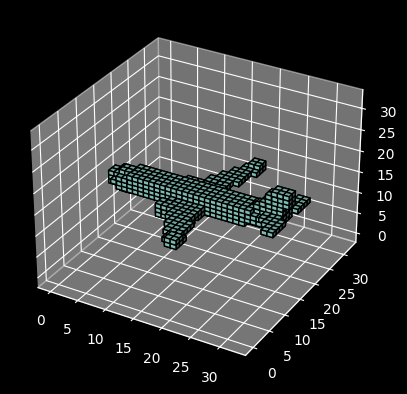

(2468, 32, 32, 32)
(2468,)


<Figure size 640x480 with 0 Axes>

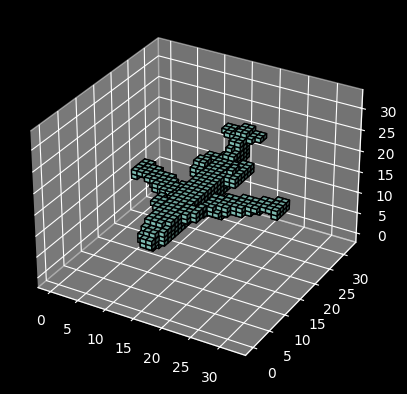

<Figure size 640x480 with 0 Axes>

In [5]:
data = np.load('Data/ModelNet40/ModelNet40Train.npz', allow_pickle=True)

train_data = data['data']
train_labels = data['labels']

print(train_data.shape)
print(train_labels.shape)

vd.render_voxel_grid(train_data[0])

data = np.load('Data/ModelNet40/ModelNet40Test.npz', allow_pickle=True)

test_data = data['data']
test_labels = data['labels']

print(test_data.shape)
print(test_labels.shape)

vd.render_voxel_grid(test_data[0])

### Voxelize Toy4K Dataset

In [ ]:
path = 'Data/toys4k_obj_files/'
dataset = 'Toys4K'
save_path = 'Data/toys4k_obj_files/toys4k'

vox = vd.Voxelize(path, dataset, system='Unix', save=True, save_path=save_path, overwrite=False)

### Test Voxelized Toy4K Data

(3158, 32, 32, 32)
(3158,)


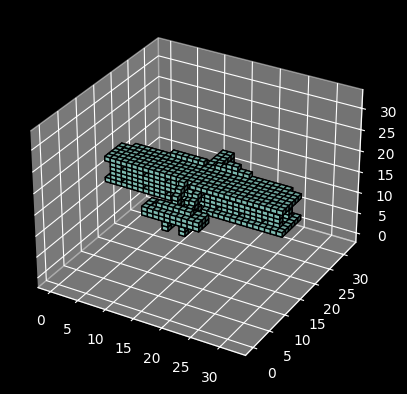

(841, 32, 32, 32)
(841,)


<Figure size 640x480 with 0 Axes>

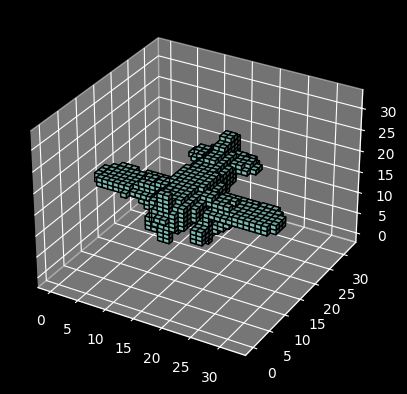

<Figure size 640x480 with 0 Axes>

In [3]:
data = np.load('Data/toys4k_obj_files/Toys4KTrain.npz', allow_pickle=True)

train_data = data['data']
train_labels = data['labels']

print(train_data.shape)
print(train_labels.shape)

vd.render_voxel_grid(train_data[0])

data = np.load('Data/toys4k_obj_files/Toys4KTest.npz', allow_pickle=True)

test_data = data['data']
test_labels = data['labels']

print(test_data.shape)
print(test_labels.shape)

vd.render_voxel_grid(test_data[0])

### Voxelize ShapeNet Dataset

In [ ]:
path = 'Data/ShapeNet/'
dataset = 'ShapeNet'
save_path = 'Data/ShapeNet/'

vox = vd.Voxelize(path, dataset, system='Unix', save=True, save_path=save_path, overwrite=False)

### Test Voxelized ShapeNet Data

(13455, 32, 32, 32)
(13455,)


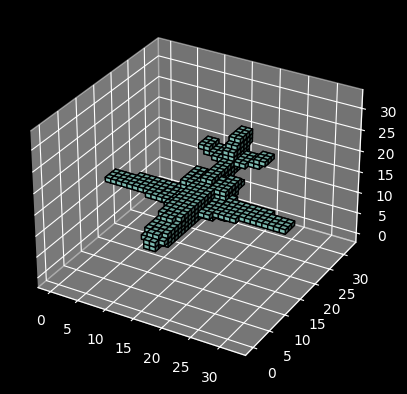

(3372, 32, 32, 32)
(3372,)


<Figure size 640x480 with 0 Axes>

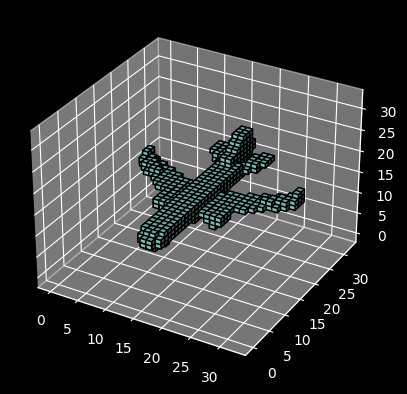

<Figure size 640x480 with 0 Axes>

In [2]:
data = np.load('Data/ShapeNet/ShapeNetTrain.npz', allow_pickle=True)

train_data = data['data']
train_labels = data['labels']

print(train_data.shape)
print(train_labels.shape)

vd.render_voxel_grid(train_data[0])

data = np.load('Data/ShapeNet/ShapeNetTest.npz', allow_pickle=True)

test_data = data['data']
test_labels = data['labels']

print(test_data.shape)
print(test_labels.shape)

vd.render_voxel_grid(test_data[0])